## Scientific programming with the SciPy stack

## Pandas

Import libraries and check versions.

In [1]:
import pandas as pd
import numpy as np
import sys
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.4.4 |Continuum Analytics, Inc.| (default, Feb 16 2016, 09:54:04) [MSC v.1600 64 bit (AMD64)]
Pandas version 0.17.1
Numpy version 1.9.3


Read the data and get a row count.  Data source: U.S. Department of Transportation, TranStats database.  Air Carrier Statistics Table T-100 Domestic Market (All Carriers):  "This table contains domestic market data reported by both U.S. and foreign air carriers, including carrier, origin, destination, and service class for enplaned passengers, freight and mail when both origin and destination airports are located within the boundaries of the United States and its territories." -- 2015

In [2]:
file_path = r'data\T100_2015.csv.gz'
df = pd.read_csv(file_path, header=0)
df.count()

PASSENGERS             168313
UNIQUE_CARRIER         168155
UNIQUE_CARRIER_NAME    168155
ORIGIN_AIRPORT_ID      168313
ORIGIN                 168313
DEST_AIRPORT_ID        168313
DEST                   168313
YEAR                   168313
MONTH                  168313
Unnamed: 9                  0
dtype: int64

In [3]:
df.head(n=10)

,PASSENGERS,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,YEAR,MONTH,Unnamed: 9
0,0,1SQ,Star Marianas Air Inc.,12016,GUM,14582,ROP,2015,1,NaN
1,0,1SQ,Star Marianas Air Inc.,14582,ROP,12016,GUM,2015,1,NaN
2,0,2E,Smokey Bay Air Inc.,12649,KEB,14942,SOV,2015,1,NaN
3,0,2O,Island Air Service,10170,ADQ,10278,ALZ,2015,1,NaN
4,0,2O,Island Air Service,10170,ADQ,12785,KPY,2015,1,NaN
5,0,2O,Island Air Service,12785,KPY,10170,ADQ,2015,1,NaN
6,0,2O,Island Air Service,12866,KYK,13934,ORI,2015,1,NaN
7,0,2O,Island Air Service,15091,SYB,10170,ADQ,2015,1,NaN
8,0,4EQ,Tanana Air Service,13196,MCG,12087,HCR,2015,1,NaN
9,0,4EQ,Tanana Air Service,13196,MCG,12676,KGX,2015,1,NaN


In [4]:
df = pd.read_csv(file_path, header=0, usecols=["PASSENGERS", "ORIGIN", "DEST"])

In [5]:
df.head(n=10)

,PASSENGERS,ORIGIN,DEST
0,0,GUM,ROP
1,0,ROP,GUM
2,0,KEB,SOV
3,0,ADQ,ALZ
4,0,ADQ,KPY
5,0,KPY,ADQ
6,0,KYK,ORI
7,0,SYB,ADQ
8,0,MCG,HCR
9,0,MCG,KGX


In [6]:
print('Min: ', df['PASSENGERS'].min())
print('Max: ', df['PASSENGERS'].max())
print('Mean: ', df['PASSENGERS'].mean())

Min:  0.0
Max:  90955.0
Mean:  2765.0627759


In [7]:
df = df.query('PASSENGERS > 10000')

In [8]:
print('Min: ', df['PASSENGERS'].min())
print('Max: ', df['PASSENGERS'].max())
print('Mean: ', df['PASSENGERS'].mean())

Min:  10004.0
Max:  90955.0
Mean:  21241.0201054


In [9]:
OriginToDestination = df.groupby(['ORIGIN', 'DEST'], as_index=False).agg({'PASSENGERS':sum,})
OriginToDestination.head(n=10)

,ORIGIN,DEST,PASSENGERS
0,ABQ,ATL,62372
1,ABQ,DAL,105677
2,ABQ,DFW,155093
3,ABQ,LAS,80928
4,ABQ,PHX,139732
5,ACY,FLL,70595
6,ACY,MCO,51451
7,AGS,ATL,10475
8,ALB,ATL,34836
9,ALB,BWI,139475


In [10]:
OriginToDestination = pd.pivot_table(OriginToDestination, values='PASSENGERS', index=['ORIGIN'], columns=['DEST'], aggfunc=np.sum)
OriginToDestination.head()

DEST,ABQ,ACY,AGS,ALB,AMA,ANC,ATL,AUS,BDL,BHM,...,STL,STT,SYR,TLH,TPA,TUL,TUS,TYS,VPS,XNA
ORIGIN,,,,,,,,,,,,,,,,,,,,,
ABQ,NaN,NaN,NaN,NaN,NaN,NaN,62372,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGS,NaN,NaN,NaN,NaN,NaN,NaN,10475,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,34836,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
OriginToDestination.fillna(0)

DEST,ABQ,ACY,AGS,ALB,AMA,ANC,ATL,AUS,BDL,BHM,...,STL,STT,SYR,TLH,TPA,TUL,TUS,TYS,VPS,XNA
ORIGIN,,,,,,,,,,,,,,,,,,,,,
ABQ,0,0,0,0,0,0,62372,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGS,0,0,0,0,0,0,10475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALB,0,0,0,0,0,0,34836,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATL,51467,0,10043,45742,0,0,0,240178,212391,248491,...,265919,44196,68519,39320,664247,10816,0,0,117362,0
AUS,0,0,0,0,0,0,235979,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SymPy

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible.

In [13]:
import sympy
from sympy import *
from sympy.stats import *
from sympy import symbols
from sympy.plotting import plot
from sympy.interactive import printing
printing.init_printing(use_latex=True)
print('Sympy version ' + sympy.__version__)

Sympy version 1.0


This example was gleaned from:
Rocklin, Matthew, and Andy R. Terrel. "Symbolic Statistics with SymPy." Computing in Science & Engineering 14.3 (2012): 88-93.

Problem: Data assimilation -- we want to assimilate new measurements into a set of old measurements.  Both sets of measurements have uncertainty.  For example, ACS estimates updated with local data.

Assume we've estimated that the temperature outside is 30 degrees.  However, there is certainly uncertainty is our estimate.  Let's say +- 3 degrees.  In Sympy, we can model this with a normal random variable.

In [14]:
T = Normal('T', 30, 3)

What is the probability that the temperature is actually greater than 33 degrees?

<img src="eq1.png">




We can use Sympy's integration engine to calculate a precise answer.

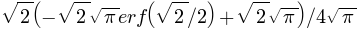

In [16]:
P(T > 33)

In [17]:
N(P(T > 33))

Assume we now have a thermometer and can measure the temperature.  However, there is still uncertainty involved.

In [18]:
noise = Normal('noise', 0, 1.5)
observation = T + noise

We now have two measurements -- 30 +- 3 degrees and 26 +- 1.5 degrees.  How do we combine them?  30 +- 3 was our prior measurement.  We want to cacluate a better estimate of the temperature (posterior) given an observation of 26 degrees.
<img src="eq2.png">

In [19]:
T_posterior = given(T, Eq(observation, 26))